# Validación cruzada

por Mónica Tatiana Gutierrez Ballen

version 1.0, Agosto 2021

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [Rick Muller](http://www.cs.sandia.gov/~rmuller/), Sandia National Laboratories

### Un problema de regresión

Sea $y = f(x) + ruido... $ 

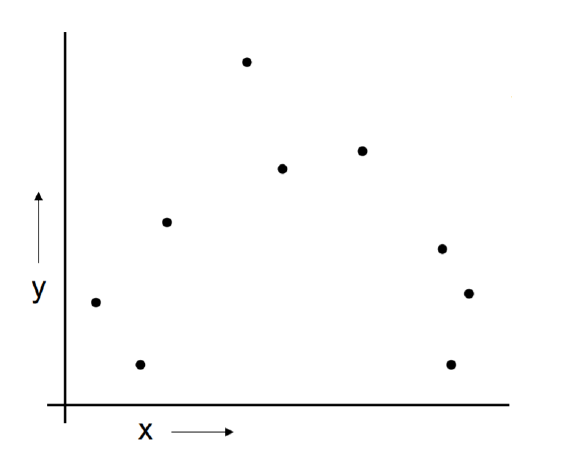


¿Podemos aprender de éste modelo?


**Consideremos tres métodos**



*   Regresión líneal

$ \hat{y_i} = \hat{\beta_0} + \hat{\beta_1}X_i$

$ \hat{\beta} = (X'X)^{-1}X'Y$

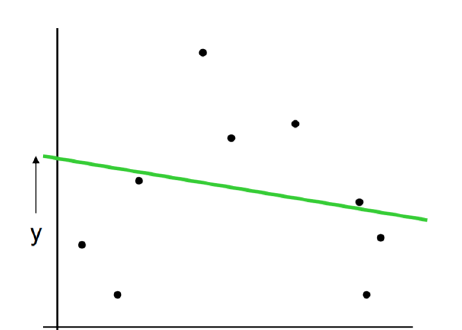







*   Regresión Cúbica

$ \hat{y_i} = \hat{\beta_0} + \hat{\beta_1}X_i + \hat{\beta_2}X^2_i$

$ \hat{\beta} = (X'X)^{-1}X'Y$

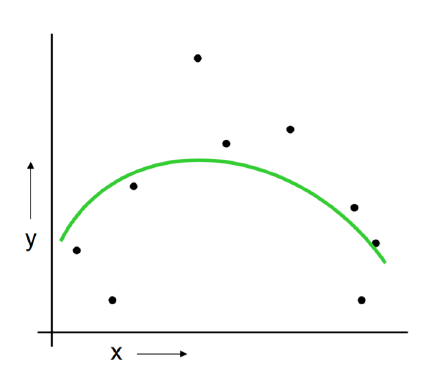







*   Regresión No Paramétrica

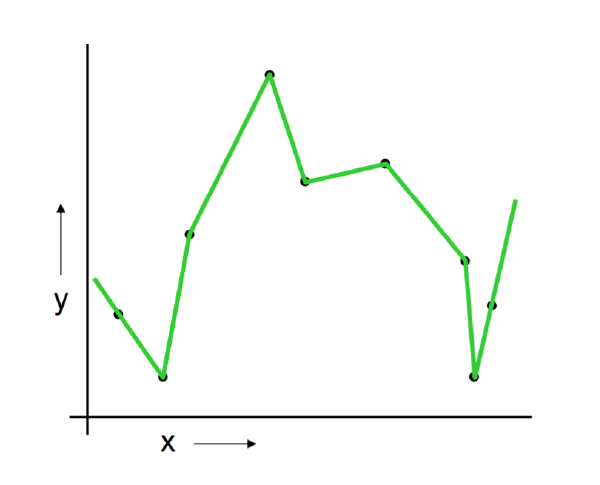






*Cuál es mejor al momento de pronosticar?*

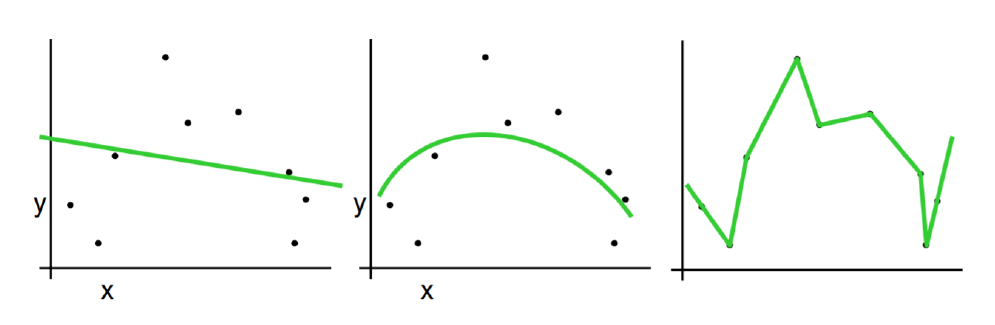

Porqué no elegir el método que mejor se ajuste a los datos? Se debe pensar
que tan bien se va a predecir futuros datos extraidos de la misma
distribución



# Solución 1: Validación cruzada

La validación cruzada es una técnica para evaluar modelos de ML mediante el entrenamiento de varios modelos de ML en subconjuntos de los datos de entrada disponibles y evaluarlos con el subconjunto complementario de los datos. Utilice la validación cruzada para detectar el subajuste o sobreajuste, es decir, en aquellos casos en los que no se logre generalizar un patrón. 

La finalidad última de un modelo es predecir la variable respuesta en observaciones futuras o en observaciones que el modelo no ha “visto” antes. El error mostrado por defecto tras entrenar un modelo suele ser el error de entrenamiento, el error que comete el modelo al predecir las observaciones que ya ha “visto”. Si bien estos errores son útiles para entender cómo está aprendiendo el modelo (estudio de residuos), no es una estimación realista de cómo se comporta el modelo ante nuevas observaciones (el error de entrenamiento suele ser demasiado optimista). Para conseguir una estimación más certera, se tiene que recurrir a un conjunto de test o emplear estrategias de validación basadas en resampling.

## El corazón de la predicción

$\beta$ en los modelos paramétricos (Ajustados a partir de la muestra)

<center> 
$ \hat{y_i} = \color{red}{\hat{\beta_0}} + \color{red}{\hat{\beta_1}}X_i$

$ \hat{\beta} = (X'X)^{-1}X'Y$

$ \hat{y_i} = \color{red}{\hat{\beta_0}} + \color{red}{\hat{\beta_1}}X_i + \color{red}{\hat{\beta_2}}X^2_i$

$ \hat{\beta} = (X'X)^{-1}X'Y$

</center>

El parámetro de flexibilización $\color{red}{(h)}$ en los modelos no paramétricos.

Se deben elegir de forma tal que proporcionen predicciones lo
suficientemente precisas.

En los modelos no paramétricos el valor $\color{red}{(h)}$ está ligado a la precisión de
las predicciones realizadas por el modelo.
Un modelo predictivo se considera bueno cuando tiene un alto poder
de predicción.

La precisión se mide con una función de pérdida
<center> 
$MSE = \frac {1}{n} \sum_{n}^{i=1} (y_{i}-\hat{f}(x_i))^2$
</center>

Existen dos diferentes tipos de error (MSE) que se pueden calcular:

* Error de entrenamiento: Aplicado a las observaciones usadas en el
método de entrenamiento
* Error de prueba: Obtenido al momento de aplicar el modelo
entrenado a una observación no usada en su entrenamiento

*Nota: No es aconsejable usar el error de entrenamiento como herramienta de
desición ya que con éste se puede producir Over-fitting.* 



**Ejemplo**

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import itertools

plt.style.use('ggplot')

In [2]:
urlDataset = 'https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/houses_prices_prediction.csv.zip'
data = pd.read_csv(urlDataset)
data.head()

,area,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
# Crear variable area^2
data['area2'] = data['area'] ** 2

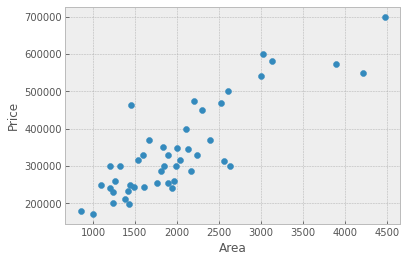

In [4]:
plt.style.use('bmh')
y = data[' price'].values
X = data['area'].values
plt.scatter(X, y)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()



In [5]:
# Crear variables para el modelo
y = data[' price'].values
X = data[['area','area2']].values

# Estandarizar variables

from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))
X = ss.transform(X.astype(np.float))

In [6]:
### Escoger los modelos a comparar
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

clf1 = LinearRegression()
clf2 = SGDRegressor( max_iter=10000,tol=None)


In [ ]:
#Estimar los modelos
clf1.fit(X, y)
clf2.fit(X, y)

In [8]:
# Calcular los y estimados (gorrito) con la regresión 
y_pred_reg1 = clf1.predict(X)
y_pred_reg2 = clf2.predict(X)

In [9]:
X_ = pd.DataFrame(X, columns = ['area_1','area_2'])
X_.head()

,area_1,area_2
0,0.131415,-0.047860
1,-0.509641,-0.508354
2,0.507909,0.281001
3,-0.743677,-0.645244
4,1.271071,1.080222


In [10]:
# Calcular el mse para cada uno de los modelos
from sklearn import metrics
import numpy as np
print('MSE regresión lineal:', metrics.mean_squared_error(data[' price'], y_pred_reg1))
print('MSE regresión SGD:', metrics.mean_squared_error(data[' price'], y_pred_reg2))

MSE regresión lineal: 4115290102.0599403
MSE regresión SGD: 4115297975.0137305


## Tipos de Validación Cruzada





### Conceptos importantes antes de empezar

* Conjunto de entrenamiento (training set): datos/observaciones con las que se entrena el modelo.

* Conjunto de validación y conjunto de test (validation set y test set): datos/observaciones del mismo tipo que las que forman el conjunto de entrenamiento pero que no se han empleado en la creación del modelo. Son datos que el modelo no ha “visto”.

* Error de entrenamiento (training error): error que comete el modelo al predecir observaciones que pertenecen al conjunto de entrenamiento.


### Validación simple


Consiste en dividir aleatoriamente el conjunto en dos partes, un conjunto de
entrenamiento y un conjunto de validación. Supongamos que los puntos
azules son el conjunto de entrenamiento.
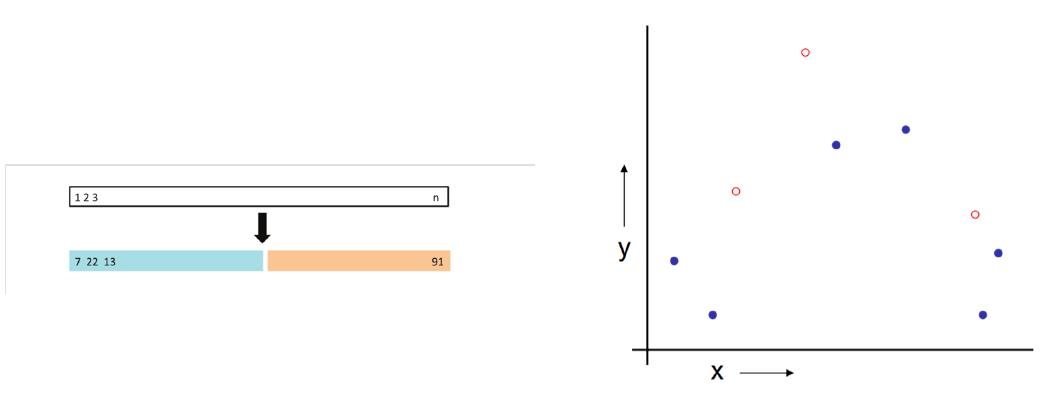

Para qué se quieren dividir los datos?

1. Calibración (Tunning): Un modelo predictivo debe ser controlado en su
parámetro de flexibilidad para prevenir Over-fitting (Selección de
variables en regresión,  en Ridge y Lasso, h en Kernels, etc.)

2. Comparación de diferentes modelos (que no comparten el parámetro
de calibración): Escoger entre modelos ya calibrados. Ejemplo Lasso y
modelo lineal no saturado.

Analice las siguientes 3 gráficas, *¿Cuál es el modelo que seleccionaría?*

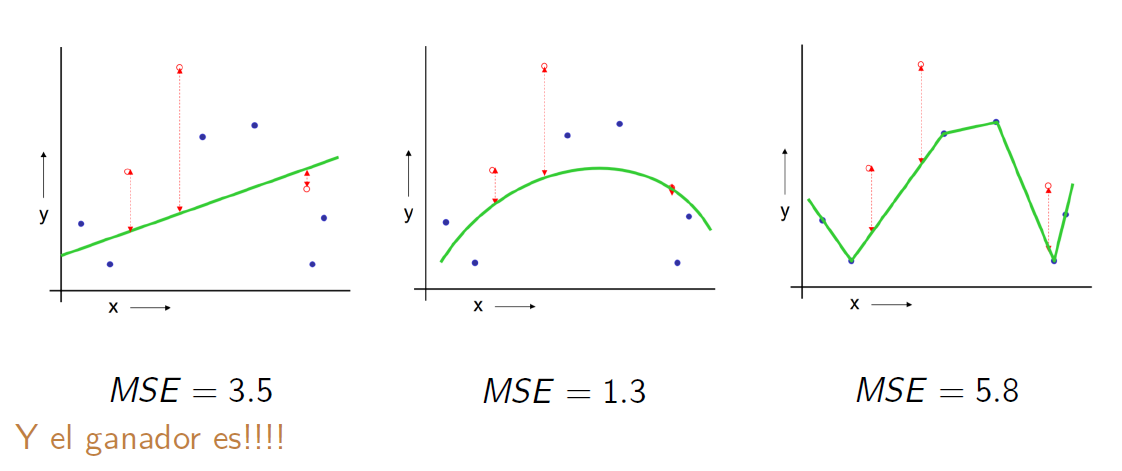

*¿Y cómo se hace en Python?*

In [11]:
# Separar entre entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31, 2) (16, 2) (31,) (16,)


In [12]:
#Estimar los modelos con el conjunto de entrenamiento
clf1_tt = LinearRegression()
clf1_tt.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Calcular los y estimados (gorrito) con el conjunto de validación
y_pred_tt = clf1.predict(X_test)

In [14]:
# Calcular el mse para el modelo
print('MSE regresión lineal:', metrics.mean_squared_error(y_test, y_pred_tt))

MSE regresión SGD: 5923570564.699193



Ventajas:

* Es una forma simple de particionar los datos para entender la diferencia entre el error de entrenamiento y validación.
* Se escoje el conjunto mínimo con el valor del MSE

Desventajas:

* La estimación del error es altamente variable dependiendo de qué observaciones se incluyan como conunto de entrenamiento y cuáles como conjunto de validación (problema de varianza).

* El tamaño de los conjuntos de entrenamiento y validación se adjudica
de manera subjetiva. (¿Qué es mejor?¿90-10?¿80-20?¿70-30?¿60-40?¿50-50?)

* Al excluir parte de las observaciones disponibles como datos de entrenamiento (generalmente el 20%), se dispone de menos información con la que entrenar el modelo y, por lo tanto, se reduce su capacidad. Esto suele tener como consecuencia una sobrestimación del error comparado al que se obtendría si se emplearan todas las observaciones para el entrenamiento (problema de sesgo).

### LOOCV

El método LOOCV en un método iterativo que se inicia empleando como conjunto de entrenamiento todas las observaciones disponibles excepto una, que se excluye para emplearla como validación.

*Consideración: Si se emplea una única observación para calcular el error, este varía mucho dependiendo de qué observación se haya seleccionado.*

Para evitarlo, el proceso se repite tantas veces como observaciones disponibles, excluyendo en cada iteración una observación distinta, ajustando el modelo con el resto y calculando el error con dicha observación para finalmente, calcular el error estimado por el LOOCV que es el promedio de todos lo i errores calculados.

**Proceso**

1. Elegir na única observación conforma el conjunto de validación $(x_1,y_1)$.Las observaciones restantes componen el subconjunto de entrenamiento $(x_2,y_2),...,(x_n,y_n)$.

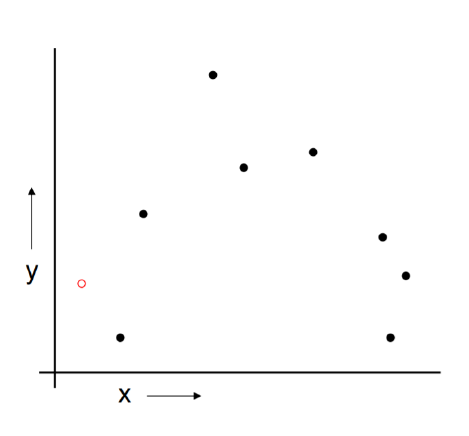

2. El modelo se ajusta sobre las $n − 1$ observaciones en entrenamiento.

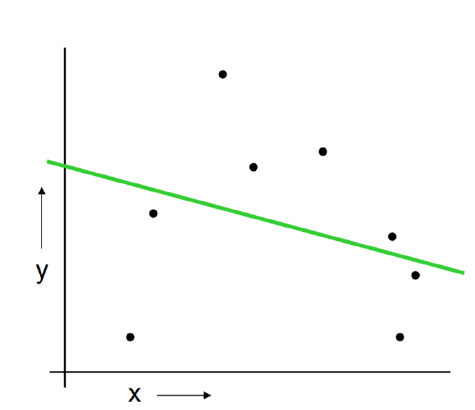

3. Se realiza la predicción $\hat{y}_1 = f(x_1)$



4. Se calcula el MSE entre el valor de $y_1$ y $\hat{y}_1$, el cual es una estimación no sesgada del error de prueba MSE. Sin embargo es una estimación muy pobre, basada en una observación única, lo cual no evita el problema de variabilidad en MSE. 
5. Para $i=1$ hasta $n$
 * Sea $(x_i,y_i)$ la la i-ésima observación
 * Remueva temporalmente $(x_i,y_i)$ de la base
 * Entrene el modelo con las $n − 1$ observaciones disponibles
 * Se realiza la predicción $\hat{y}_i = f(x_i)$
 * Calcule $\hat{MSE}_i = (y_i - \hat{y}_i)^2$


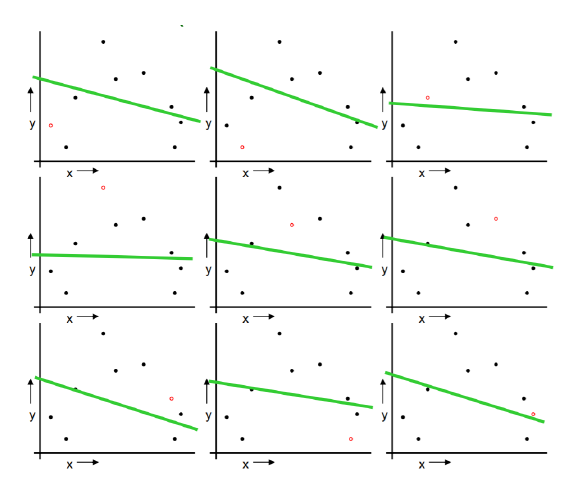

6. LOOCV corresponde al promedio de esos MSE estimados:

<center> 

$CV_{(n)}=\frac{1}{n}\sum_{i=1}^n MSE_i$
</center> 


*¿Y cómo se hace en Python?*

In [15]:
# Crear el metodo LOOCV
from sklearn.model_selection import LeaveOneOut
cv = LeaveOneOut()

In [16]:
y_true, y_pred_loocv = list(), list()
for train_ix, test_ix in cv.split(X):
	# separar datos
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# estimar datos
	clf1_tt.fit(X_train, y_train)
	# Evaluar el modelo
	yhat = clf1_tt.predict(X_test)
	# guardar en vectores
	y_true.append(y_test[0])
	y_pred_loocv.append(yhat[0])

In [17]:
# Calcular el mse para el modelo
print('MSE regresión regresión lineal:', metrics.mean_squared_error(y_true, y_pred_loocv))

MSE regresión SGD: 4716054171.913938


Ventajas:

* Tiene mucho menos sesgo ya que no tiende a sobre-estimar tanto el
error de entrenamiento.
* LOCCV siempre arrojará los mismos resultados ya que el algoritmo elimina la aleatoriedad intrínseca en la división de los subconjuntos que se tiene en el enfoque del conjunto de validación.

Desventajas: 
* Implementación computacional, es muy "pesado" de desarrollar dado que debe pasar por todas las observaciones.

***Y SI TENEMOS LO MEJOR DE AMBOS MUNDOS?***

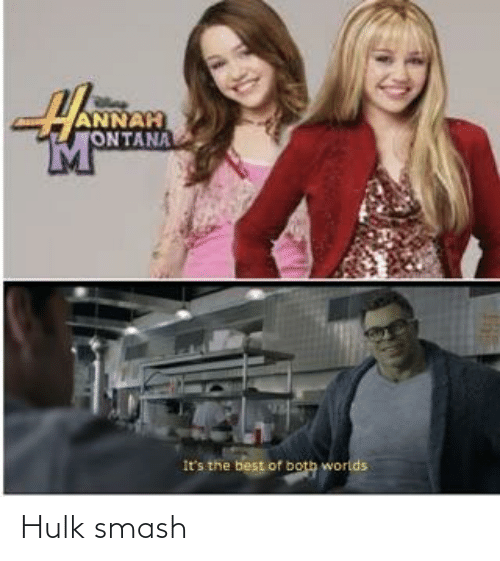



### K-Fold Cross Validation

El método K-Fold Cross-Validation es también un proceso iterativo. Consiste en dividir los datos de forma aleatoria en k grupos de aproximadamente el mismo tamaño, k-1 grupos se emplean para entrenar el modelo y uno de los grupos se emplea como validación. 

Luego se repite el proceso k veces utilizando un grupo distinto como validación en cada iteración. El proceso genera k estimaciones del error cuyo promedio se emplea como estimación final.





**Proceso**

1. El algoritmo inicia partiendo la muestra en k
folds iguales (3 por ejemplo). Las particiones son generalmente de igual
tamaño.

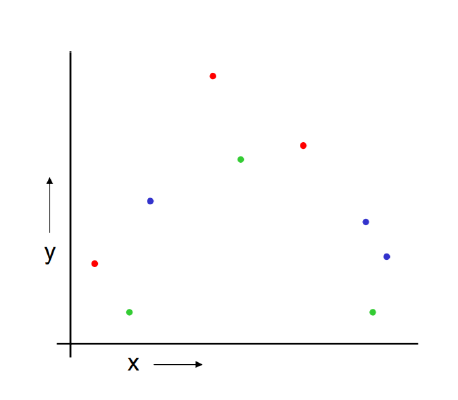




2. La primera partición se toma como conjunto de test.
3. El modelo se entrena con los $k − 1$(2) folds restantes.
4. Se calcula el error de prueba sobre el conjunto de test $\hat{MSE}_{k1} = (y_{k1} - \hat{y}_{k1})^2$



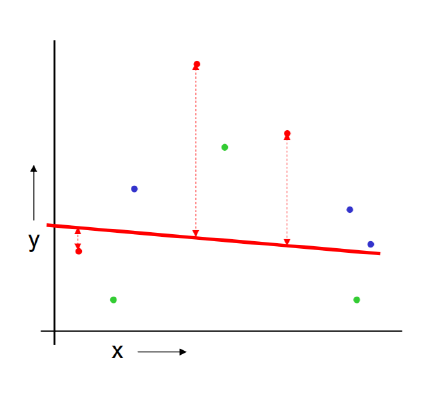

5. La segunda partición se toma como conjunto de test.
6. El modelo se entrena con los $k − 1$(2) folds restantes.
7. Se calcula el error de prueba sobre el conjunto de test $\hat{MSE}_{k2} = (y_{k2} - \hat{y}_{k2})^2$

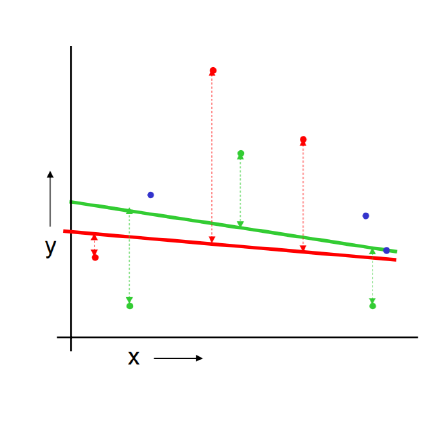

8. La tercera partición se toma como conjunto de test.
9. El modelo se entrena con los $k − 1$(2) folds restantes.
10. Se calcula el error de prueba sobre el conjunto de test $\hat{MSE}_{k3} = (y_{k3} - \hat{y}_{k3})^2$

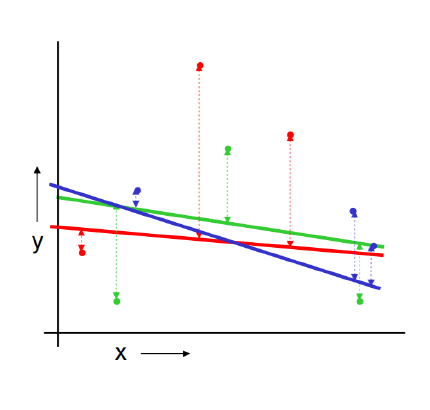

11. Cómo último paso se calcula el RMSE global de la siguiente manera:

<center> 

$MSE_{k-fold}=\frac{1}{k}\sum_{i=1}^k MSE_k$
</center> 



*¿Y cómo se hace en Python?*

In [18]:
# Crear el metodo K fold CV
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=666, shuffle=True)

In [19]:
# Estimar el modelo en cada uno de los k folds
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf1_tt, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

In [20]:
# Calcular el mse para el modelo (https://www.kaggle.com/questions-and-answers/154600)
print('MSE regresión SGD:', abs(np.mean(scores)))

MSE regresión SGD: 4819766338.972726


Ventajas:

* Fácil de implementar
* Requiere solo ajustar el modelo de aprendizaje k veces: el número de iteraciones necesarias viene determinado por el valor k escogido. Por lo general, se recomienda un k entre 5 y 10. LOOCV es un caso particular de K-Fold Cross-Validation en el que k = nº observaciones, si el data set es muy grande o el modelo muy complejo, se requiere muchas más iteraciones. 
* Balance entre bias y varianza: la principal ventaja de K-fold CV es que consigue una estimación precisa del error de test gracias a un mejor balance entre bias y varianza.

Desventajas: 
* Dependiendo del número de particiones puede ser
computacionalmente costoso

***Nota importante:*** El uso de las anteriores técnicas solventa el problema de sobre ajustar el modelo realizando particiones entre entrenamiento-test *sin embargo* en el método de LOOCV y K-Fold *todos* los datos los ve el modelo, lo que asegura que conoce *todo el universo de datos posibles* ¿Cómo nos aseguramos que cuándo lleguen predicciones totalmente nuevas, el modelo vaya a generalizar y predecir bien eso que no conoce?¿Es posible realizar un paso extra asegurandose que exista un conjunto de datos que el modelo *nunca* vea y tener un conocimiento real sobre el ajuste del modelo?



[Otras soluciones interesantes](https://www.cienciadedatos.net/documentos/30_cross-validation_oneleaveout_bootstrap#K-Fold_Cross-Validation)